<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Maharashtra/bjpMaharashtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 432 (delta 5), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (432/432), 20.13 MiB | 31.95 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [3]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp maharashtra"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_maharashtra.csv',index = False)

Streaming output truncated to the last 5000 lines.
Marine Lines, Mumbai
Twitter Web App
0
22
589
0
<--------------------------------------------------->
853
2020-11-16 22:57:41
1328472337885192194
False
Rock Star of BJP Maharashtra 🙏
Best Wishes Ji 👍🇮🇳💪🚩🙏 https://t.co/PtJDdlYQTb
srjk22
Tamil Nadu, India
Twitter for Android
5
15405
6588
1
<--------------------------------------------------->
854
2020-11-16 22:33:26
1328466233860055043
False
@CTRavi_BJP my father Shri B.M.Subbanna,who is no more is from Chilkamagluru, &amp;myself his daughter born in Chennai &amp;has been brought up in Noth India &amp; Settled in Maharashtra is Part of @BJP4Maharashtra in the State Core Team of Intellectual Cell so this is the greatness of Party https://t.co/Eh0wD17HWH
sukanyaiyer2
Mumbai,Maharashtra
Twitter for Android
3
9473
1446
2
<--------------------------------------------------->
855
2020-11-16 21:41:47
1328453237075185666
False
@Sanjeev26109683 @VermaDaksha2000 @saraf_pankaj Where does Rahul come

In [4]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1212 non-null   datetime64[ns]
 1   Tweet_id   1212 non-null   int64         
 2   Verified   1212 non-null   bool          
 3   Tweet      1212 non-null   object        
 4   User       1212 non-null   object        
 5   Location   1212 non-null   object        
 6   Source     1212 non-null   object        
 7   Likes      1212 non-null   int64         
 8   Followers  1212 non-null   int64         
 9   Following  1212 non-null   int64         
 10  Retweets   1212 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 96.0+ KB


In [6]:
df.shape

(1212, 11)

In [7]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [8]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [9]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [10]:
df['Source'].value_counts()

Twitter for Android       677
Twitter Web App           309
Twitter for iPhone        126
TweetDeck                  29
WordPress.com              15
Twitter for iPad           11
IFTTT                       7
cmssocialservice            7
ht-twitter-handler          4
econ b2b post               4
Hootsuite Inc.              3
Buffer                      2
Devdiscourse News Desk      2
Rajneeti News               2
NDTVfeed                    1
Jenkers Eng Posting         1
ClarionIndia                1
LinkedIn                    1
Republicworld               1
SocialFlow                  1
garda-security-alerts       1
meditation Affinity         1
PTI_Tweets                  1
Instagram                   1
FS Poster                   1
RSSMultiply                 1
Sprout Social               1
HW news english             1
Name: Source, dtype: int64

In [11]:
df['Location'].nunique()

346

In [12]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

1212

In [13]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


1202

In [15]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [16]:
df['Tweet'].duplicated().sum()

10

In [17]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(1202, 11)

In [18]:
df['Tweet'].duplicated().sum()

0

In [19]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [20]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [21]:
df.shape

(1202, 12)

In [22]:
df['Processed_Tweet']

0       @Dev_Fadnavis ##One of the useless &amp; unwan...
1       @TimesNow @Dev_Fadnavis So you have been perma...
2       Congress minister says no 'love jihad' law in ...
3       “To bring a law for love jihad is foolishness....
4       @silentkill_004 @beingarun28 @Ok_Bharatiya @De...
                              ...                        
1197    Is this true ! If it is it's not shocking at a...
1198    @KiritSomaiya @madskak I APPRECIATE that you a...
1199    Shivsena + Congress and AIMIM + BJP\nImo it's ...
1200    @CTRavi_BJP @ChDadaPatil Congratulations sir.\...
1201    @TeamTrump To Donald Trump Ji\nThis Diwali, I ...
Name: Processed_Tweet, Length: 1202, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0       @Dev_Fadnavis ##One of the useless &amp; unwan...
1       @TimesNow @Dev_Fadnavis So you have been perma...
2       Congress minister says no 'love jihad' law in ...
3       “To bring a law for love jihad is foolishness....
4       @silentkill_004 @beingarun28 @Ok_Bharatiya @De...
                              ...                        
1197    Is this true ! If it is it's not shocking at a...
1198    @KiritSomaiya @madskak I APPRECIATE that you a...
1199    Shivsena + Congress and AIMIM + BJP\nImo it's ...
1200    @CTRavi_BJP @ChDadaPatil Congratulations sir.\...
1201    @TeamTrump To Donald Trump Ji\nThis Diwali, I ...
Name: Processed_Tweet, Length: 1202, dtype: object

In [26]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0         ##One of the useless &amp; unwanted politici...
1           So you have been permanently kicked out of...
2       Congress minister says no 'love jihad' law in ...
3       “To bring a law for love jihad is foolishness....
4                         Today or tomorrow Fadnavis w...
                              ...                        
1197    Is this true ! If it is it's not shocking at a...
1198        I APPRECIATE that you are taking up this c...
1199    Shivsena + Congress and AIMIM + BJP\nImo it's ...
1200        Congratulations sir.\nWelcome to Maharashtra 
1201      To Donald Trump Ji\nThis Diwali, I Send You ...
Name: Processed_Tweet, Length: 1202, dtype: object

In [27]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0         ##One of the useless &amp; unwanted politici...
1           So you have been permanently kicked out of...
2       Congress minister says no 'love jihad' law in ...
3       “To bring a law for love jihad is foolishness....
4                         Today or tomorrow Fadnavis w...
                              ...                        
1197    Is this true ! If it is it's not shocking at a...
1198        I APPRECIATE that you are taking up this c...
1199    Shivsena + Congress and AIMIM + BJP\nImo it's ...
1200        Congratulations sir.\nWelcome to Maharashtra 
1201      To Donald Trump Ji\nThis Diwali, I Send You ...
Name: Processed_Tweet, Length: 1202, dtype: object

In [28]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0         #One of the useless &amp; unwanted politicia...
1           So you have been permanently kicked out of...
2       Congress minister says no 'love jihad' law in ...
3       “To bring a law for love jihad is foolishness....
4                         Today or tomorrow Fadnavis w...
                              ...                        
1197    Is this true ! If it is it's not shocking at a...
1198        I APPRECIATE that you are taking up this c...
1199    Shivsena + Congress and AIMIM + BJP\nImo it's ...
1200        Congratulations sir.\nWelcome to Maharashtra 
1201      To Donald Trump Ji\nThis Diwali, I Send You ...
Name: Processed_Tweet, Length: 1202, dtype: object

In [29]:
!pip install tweet-preprocessor

In [30]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0       of the useless &amp; unwanted politician in BJ...
1       So you have been permanently kicked out of Mah...
2       Congress minister says no 'love jihad' law in ...
3       To bring a law for love jihad is foolishness. ...
4       Today or tomorrow Fadnavis will become CM of M...
                              ...                        
1197    Is this true ! If it is it's not shocking at a...
1198    I APPRECIATE that you are taking up this case ...
1199    Shivsena + Congress and AIMIM + BJPImo it's go...
1200           Congratulations sir.Welcome to Maharashtra
1201    To Donald Trump JiThis Diwali, I Send You A Lo...
Name: Processed_Tweet, Length: 1202, dtype: object

In [31]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0       of the useless  amp  unwanted politician in BJ...
1       So you have been permanently kicked out of Mah...
2       Congress minister says no  love jihad  law in ...
3       To bring a law for love jihad is foolishness  ...
4       Today or tomorrow Fadnavis will become CM of M...
                              ...                        
1197    Is this true   If it is it s not shocking at a...
1198    I APPRECIATE that you are taking up this case ...
1199    Shivsena   Congress and AIMIM   BJPImo it s go...
1200           Congratulations sir Welcome to Maharashtra
1201    To Donald Trump JiThis Diwali  I Send You A Lo...
Name: Processed_Tweet, Length: 1202, dtype: object

In [32]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0       of the useless  amp  unwanted politician in bj...
1       so you have been permanently kicked out of mah...
2       congress minister says no  love jihad  law in ...
3       to bring a law for love jihad is foolishness  ...
4       today or tomorrow fadnavis will become cm of m...
                              ...                        
1197    is this true   if it is it s not shocking at a...
1198    i appreciate that you are taking up this case ...
1199    shivsena   congress and aimim   bjpimo it s go...
1200           congratulations sir welcome to maharashtra
1201    to donald trump jithis diwali  i send you a lo...
Name: Processed_Tweet, Length: 1202, dtype: object

In [33]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'maharashtra government declares to probe   rise in power bills arrears during bjp government'

In [34]:
df['User'].value_counts()

Tiger_UdaySingh    12
INDdotNews          7
TimesNow            7
pawar_ash           6
NagariMumbaikar     6
                   ..
rupesh0210          1
SidhuTwits          1
NinadSharma11       1
y_n_joshi           1
TruthSe98435966     1
Name: User, Length: 1023, dtype: int64

In [35]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


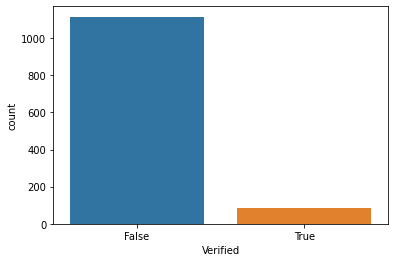

In [36]:
bar = sns.countplot(df['Verified'])

In [37]:
df['Verified'].value_counts()

False    1115
True       87
Name: Verified, dtype: int64

In [38]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

TimesNow           7
TOICitiesNews      5
fpjindia           5
IndiaToday         5
MumbaiMirror       4
TOIMumbai          4
ThePuneMirror      4
HindustanTimes     4
ANI                3
HTMumbai           2
timesofindia       2
JantaKaReporter    2
ETEnergyWorld      2
latestly           2
thewire_in         2
CNNnews18          1
LogicalIndians     1
news18dotcom       1
MrsGandhi          1
republic           1
Rajput_Ramesh      1
htTweets           1
scroll_in          1
IndianExpress      1
faisalmushtaque    1
TOI_Nagpur         1
ndtv               1
TOIAurangabad      1
OpIndia_com        1
ians_india         1
bb_thorat          1
the_hindu          1
FinancialXpress    1
AslamShaikh_MLA    1
INCMumbai          1
ABPNews            1
EconomicTimes      1
GetNewsd           1
mid_day            1
thenewsminute      1
Sootradhar         1
savukku            1
ndtvfeed           1
tv9gujarati        1
CatchNews          1
RiaRevealed        1
manasi87           1
AmitV_Deshmuk

In [39]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 175, 16: 185, 17: 166, 18: 186, 19: 146, 20: 167, 21: 177})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

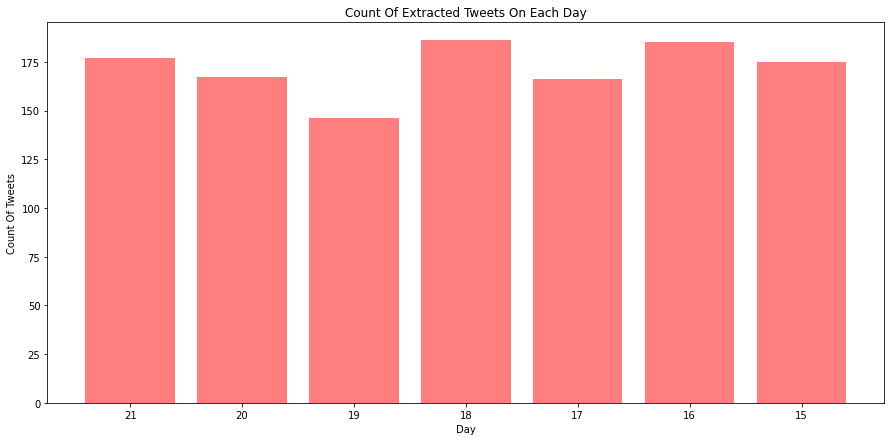

In [40]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [41]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 10,
         1: 17,
         2: 25,
         3: 30,
         4: 73,
         5: 88,
         6: 84,
         7: 71,
         8: 86,
         9: 78,
         10: 62,
         11: 59,
         12: 82,
         13: 64,
         14: 85,
         15: 57,
         16: 73,
         17: 66,
         18: 41,
         19: 23,
         20: 15,
         21: 6,
         22: 2,
         23: 5})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

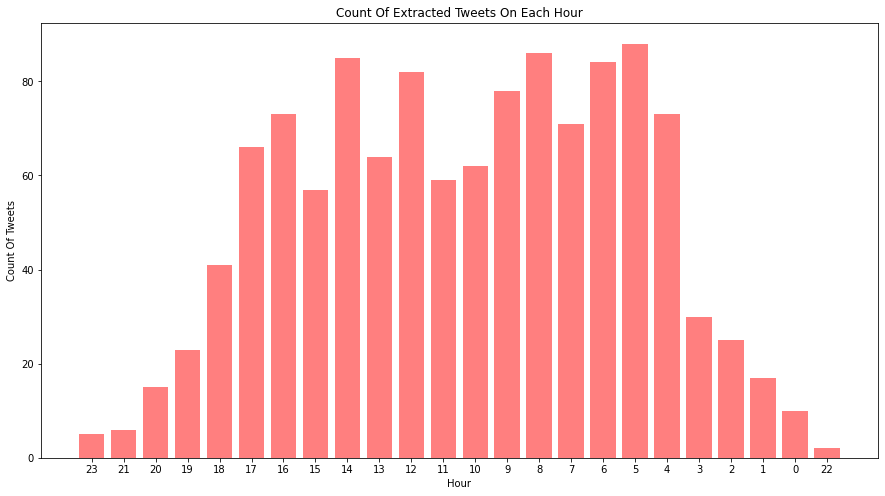

In [42]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [43]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['been', 'hasn', 'at', 'll', "won't", 'itself', 'from', "doesn't", 'be', 'my', 'me', 'should', 're', "shouldn't", 'further', 'they', 'your', 'have', 'an', 'same', 's', 't', 'won', 'am', 'with', 'very', 'but', "mustn't", 'more', 'the', 'our', 'yourself', 'as', "wouldn't", 'm', 'mustn', "needn't", 'aren', 'them', 'such', 'whom', 'how', 'just', 'don', 'does', 'did', "don't", "mightn't", 'or', 'there', 'no', "she's", 'then', 'she', 'below', 'to', 'only', 'not', 'until', 'is', 'theirs', "you're", 'against', "it's", "you'd", 'because', 'while', 'on', 'will', 'its', 'some', "wasn't", 'y', 'was', 'where', 'ain', 'under', 'wouldn', 'this', 'both', "haven't", 'and', 'nor', "couldn't", 'myself', 'through', 'those', "hadn't", 'wasn', 'd', 've', 'him', 'few', 'he', 'shouldn', 'above', 'than', 'hadn', 'isn', "didn't", 'during', 'by', 'their', 'her', 'yourselves', 'over', "hasn't", 'himself', 'his', 'having', 'out', 'hers', 'why', 'into', 'off', 'weren', 'i', "isn't", 'themselves', 'down', 'mightn', 

In [46]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0       useless unwanted politician bjp whos thrown ma...
1       permanently kicked maharashtra earlier sent u ...
2       congress minister says love jihad law maharash...
3       bring law love jihad foolishness constitution ...
4       today tomorrow fadnavis become cm maharashtra ...
                              ...                        
1197    true shocking bjp also attempting topple govt ...
1198    appreciate taking case fadnavis bjp leaders ma...
1199    shivsena congress aimim bjpimo good happens ba...
1200              congratulations sir welcome maharashtra
1201    donald trump jithis diwali send lot wishes com...
Name: Processed_Tweet, Length: 1202, dtype: object

In [47]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0       [useless, unwanted, politician, bjp, whos, thr...
1       [permanently, kicked, maharashtra, earlier, se...
2       [congress, minister, says, love, jihad, law, m...
3       [bring, law, love, jihad, foolishness, constit...
4       [today, tomorrow, fadnavis, become, cm, mahara...
                              ...                        
1197    [true, shocking, bjp, also, attempting, topple...
1198    [appreciate, taking, case, fadnavis, bjp, lead...
1199    [shivsena, congress, aimim, bjpimo, good, happ...
1200         [congratulations, sir, welcome, maharashtra]
1201    [donald, trump, jithis, diwali, send, lot, wis...
Name: Processed_Tweet, Length: 1202, dtype: object

In [48]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0       [useless, unwant, politician, bjp, who, thrown...
1       [perman, kick, maharashtra, earlier, sent, u, ...
2       [congress, minist, say, love, jihad, law, maha...
3       [bring, law, love, jihad, foolish, constitut, ...
4       [today, tomorrow, fadnavi, becom, cm, maharash...
                              ...                        
1197    [true, shock, bjp, also, attempt, toppl, govt,...
1198    [appreci, take, case, fadnavi, bjp, leader, ma...
1199    [shivsena, congress, aimim, bjpimo, good, happ...
1200                [congratul, sir, welcom, maharashtra]
1201    [donald, trump, jithi, diwali, send, lot, wish...
Name: Processed_Tweet, Length: 1202, dtype: object

In [50]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:27:11,1330291701328580610,False,@Dev_Fadnavis ##One of the useless &amp; unwan...,obhan_satish,United Kingdom,Twitter for iPhone,0,8,94,0,"[useless, unwant, politician, bjp, who, thrown..."
1,2020-11-21 23:08:33,1330287010490232833,False,@TimesNow @Dev_Fadnavis So you have been perma...,srivrajesh,"Paisley, Scotland",Twitter for iPhone,1,157,353,0,"[perman, kick, maharashtra, earlier, sent, bih..."
2,2020-11-21 23:00:05,1330284878257147906,False,Congress minister says no 'love jihad' law in ...,CFDTrading1,,RSSMultiply,0,787,818,0,"[congress, minist, say, love, jihad, law, maha..."
3,2020-11-21 21:42:04,1330265245265301504,True,“To bring a law for love jihad is foolishness....,IndianExpress,India,TweetDeck,55,3732182,316,5,"[bring, law, love, jihad, foolish, constitut, ..."
4,2020-11-21 20:30:02,1330247117336682498,False,@silentkill_004 @beingarun28 @Ok_Bharatiya @De...,Indicwingerr,,Twitter for Android,0,94,44,0,"[today, tomorrow, fadnavi, becom, maharashtra,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2020-11-15 04:07:49,1327825606340317185,False,Is this true ! If it is it's not shocking at a...,DrHarish139,Mumbai :,Twitter for Android,5,5477,1718,1,"[true, shock, bjp, also, attempt, toppl, govt,..."
1198,2020-11-15 03:40:55,1327818839292219392,False,@KiritSomaiya @madskak I APPRECIATE that you a...,Uppalsconcept,"Greater Noida, India",Twitter for Android,11,124,216,4,"[appreci, take, case, fadnavi, bjp, leader, ma..."
1199,2020-11-15 03:28:00,1327815586261262338,False,Shivsena + Congress and AIMIM + BJP\nImo it's ...,rajatgaur28,India,Twitter for Android,1,379,904,0,"[shivsena, congress, aimim, bjpimo, good, happ..."
1200,2020-11-15 03:14:09,1327812104129105920,False,@CTRavi_BJP @ChDadaPatil Congratulations sir.\...,AdvMehulParekh,"Mumbai, India",Twitter for Android,0,805,1624,0,"[congratul, sir, welcom, maharashtra]"


In [51]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

20575

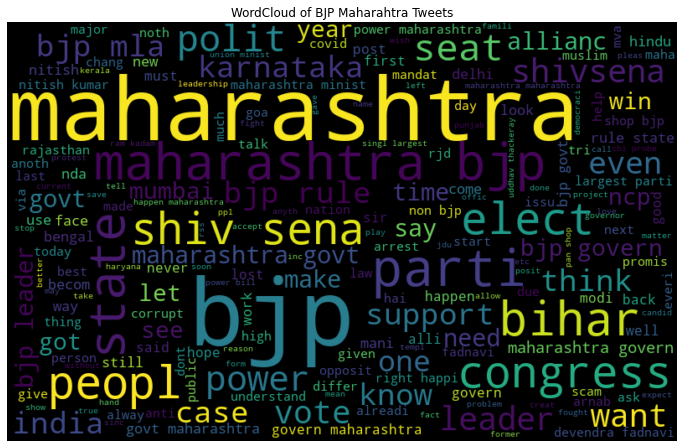

In [53]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of BJP Maharahtra Tweets")
plt.show()

In [54]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

1202

In [55]:
len(text)

20575

In [56]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 432
Negative Tweets: 216
Neutral Tweets 554


In [57]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [59]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.103,0.699,0.199,0.3818
1,0.000,1.000,0.000,0.0000
2,0.000,0.682,0.318,0.6369
3,0.081,0.692,0.227,0.5859
4,0.000,0.800,0.200,0.5423
...,...,...,...,...
1197,0.083,0.641,0.276,0.7184
1198,0.080,0.876,0.044,-0.2263
1199,0.000,0.671,0.329,0.6597
1200,0.000,1.000,0.000,0.0000


In [60]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.103,0.699,0.199,0.3818,Positive
1,0.000,1.000,0.000,0.0000,Neutral
2,0.000,0.682,0.318,0.6369,Positive
3,0.081,0.692,0.227,0.5859,Positive
4,0.000,0.800,0.200,0.5423,Positive


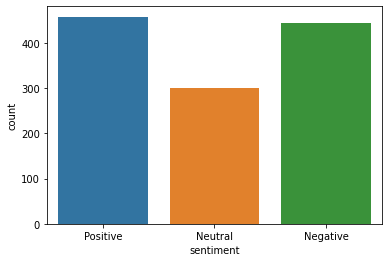

In [61]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [63]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Maharashtra/bjp_maharashtra.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

2158

In [64]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [66]:
word_emotion=dict()
for i in range(0,2158):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [68]:
for i in range(0,1202):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [69]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

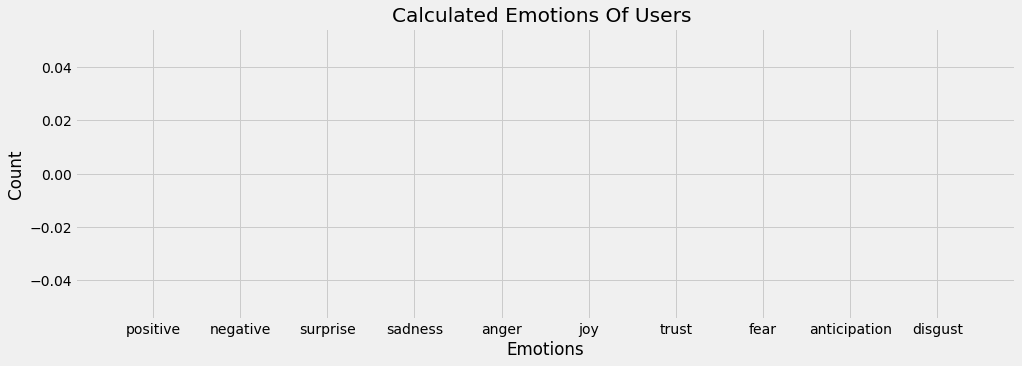

In [70]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [73]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [74]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                                  413
India                             102
Mumbai, India                      63
Mumbai                             34
New Delhi, India                   29
                                 ... 
Tirupur, India                      1
Jogeshwari (w) Mumbai, IN-102       1
GOA                                 1
 Goa                                1
Pune, Maharashtra, India            1
Name: Location, Length: 343, dtype: int64

In [75]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:27:11,1330291701328580610,False,@Dev_Fadnavis ##One of the useless &amp; unwan...,obhan_satish,United Kingdom,Twitter for iPhone,0,8,94,0,"[useless, unwant, politician, bjp, who, thrown...",United Kingdom
1,2020-11-21 23:08:33,1330287010490232833,False,@TimesNow @Dev_Fadnavis So you have been perma...,srivrajesh,"Paisley, Scotland",Twitter for iPhone,1,157,353,0,"[perman, kick, maharashtra, earlier, sent, bih...",Paisley
2,2020-11-21 23:00:05,1330284878257147906,False,Congress minister says no 'love jihad' law in ...,CFDTrading1,,RSSMultiply,0,787,818,0,"[congress, minist, say, love, jihad, law, maha...",
3,2020-11-21 21:42:04,1330265245265301504,True,“To bring a law for love jihad is foolishness....,IndianExpress,India,TweetDeck,55,3732182,316,5,"[bring, law, love, jihad, foolish, constitut, ...",India
4,2020-11-21 20:30:02,1330247117336682498,False,@silentkill_004 @beingarun28 @Ok_Bharatiya @De...,Indicwingerr,,Twitter for Android,0,94,44,0,"[today, tomorrow, fadnavi, becom, maharashtra,...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2020-11-15 04:07:49,1327825606340317185,False,Is this true ! If it is it's not shocking at a...,DrHarish139,Mumbai :,Twitter for Android,5,5477,1718,1,"[true, shock, bjp, also, attempt, toppl, govt,...",Mumbai :
1198,2020-11-15 03:40:55,1327818839292219392,False,@KiritSomaiya @madskak I APPRECIATE that you a...,Uppalsconcept,"Greater Noida, India",Twitter for Android,11,124,216,4,"[appreci, take, case, fadnavi, bjp, leader, ma...",Greater Noida
1199,2020-11-15 03:28:00,1327815586261262338,False,Shivsena + Congress and AIMIM + BJP\nImo it's ...,rajatgaur28,India,Twitter for Android,1,379,904,0,"[shivsena, congress, aimim, bjpimo, good, happ...",India
1200,2020-11-15 03:14:09,1327812104129105920,False,@CTRavi_BJP @ChDadaPatil Congratulations sir.\...,AdvMehulParekh,"Mumbai, India",Twitter for Android,0,805,1624,0,"[congratul, sir, welcom, maharashtra]",Mumbai


In [76]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [77]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 23:27:11,1330291701328580610,False,@Dev_Fadnavis ##One of the useless &amp; unwan...,obhan_satish,United Kingdom,Twitter for iPhone,0,8,94,0,"[useless, unwant, politician, bjp, who, thrown...",United Kingdom,Positive,21
1,2020-11-21 23:08:33,1330287010490232833,False,@TimesNow @Dev_Fadnavis So you have been perma...,srivrajesh,"Paisley, Scotland",Twitter for iPhone,1,157,353,0,"[perman, kick, maharashtra, earlier, sent, bih...",Paisley,Neutral,21
2,2020-11-21 23:00:05,1330284878257147906,False,Congress minister says no 'love jihad' law in ...,CFDTrading1,,RSSMultiply,0,787,818,0,"[congress, minist, say, love, jihad, law, maha...",,Positive,21
3,2020-11-21 21:42:04,1330265245265301504,True,“To bring a law for love jihad is foolishness....,IndianExpress,India,TweetDeck,55,3732182,316,5,"[bring, law, love, jihad, foolish, constitut, ...",India,Positive,21
4,2020-11-21 20:30:02,1330247117336682498,False,@silentkill_004 @beingarun28 @Ok_Bharatiya @De...,Indicwingerr,,Twitter for Android,0,94,44,0,"[today, tomorrow, fadnavi, becom, maharashtra,...",,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


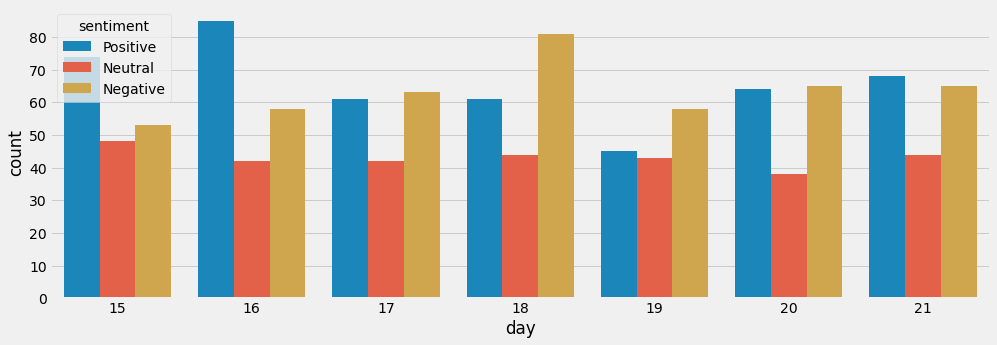

In [80]:
sns.countplot(df['day'],hue = df['sentiment'])

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [82]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:27:11,1330291701328580610,False,@Dev_Fadnavis ##One of the useless &amp; unwan...,obhan_satish,United Kingdom,Twitter for iPhone,0,8,94,0,"[useless, unwant, politician, bjp, who, thrown...",United Kingdom,Positive,21,2
1,2020-11-21 23:08:33,1330287010490232833,False,@TimesNow @Dev_Fadnavis So you have been perma...,srivrajesh,"Paisley, Scotland",Twitter for iPhone,1,157,353,0,"[perman, kick, maharashtra, earlier, sent, bih...",Paisley,Neutral,21,1
2,2020-11-21 23:00:05,1330284878257147906,False,Congress minister says no 'love jihad' law in ...,CFDTrading1,,RSSMultiply,0,787,818,0,"[congress, minist, say, love, jihad, law, maha...",,Positive,21,2
3,2020-11-21 21:42:04,1330265245265301504,True,“To bring a law for love jihad is foolishness....,IndianExpress,India,TweetDeck,55,3732182,316,5,"[bring, law, love, jihad, foolish, constitut, ...",India,Positive,21,2
4,2020-11-21 20:30:02,1330247117336682498,False,@silentkill_004 @beingarun28 @Ok_Bharatiya @De...,Indicwingerr,,Twitter for Android,0,94,44,0,"[today, tomorrow, fadnavi, becom, maharashtra,...",,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2020-11-15 04:07:49,1327825606340317185,False,Is this true ! If it is it's not shocking at a...,DrHarish139,Mumbai :,Twitter for Android,5,5477,1718,1,"[true, shock, bjp, also, attempt, toppl, govt,...",Mumbai :,Positive,15,2
1198,2020-11-15 03:40:55,1327818839292219392,False,@KiritSomaiya @madskak I APPRECIATE that you a...,Uppalsconcept,"Greater Noida, India",Twitter for Android,11,124,216,4,"[appreci, take, case, fadnavi, bjp, leader, ma...",Greater Noida,Negative,15,0
1199,2020-11-15 03:28:00,1327815586261262338,False,Shivsena + Congress and AIMIM + BJP\nImo it's ...,rajatgaur28,India,Twitter for Android,1,379,904,0,"[shivsena, congress, aimim, bjpimo, good, happ...",India,Positive,15,2
1200,2020-11-15 03:14:09,1327812104129105920,False,@CTRavi_BJP @ChDadaPatil Congratulations sir.\...,AdvMehulParekh,"Mumbai, India",Twitter for Android,0,805,1624,0,"[congratul, sir, welcom, maharashtra]",Mumbai,Neutral,15,1


In [83]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [85]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [86]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [87]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.6869806094182825
Precision Score:  0.6869806094182825
Recall Score:  0.6869806094182825
F1 Score:  0.6869806094182825


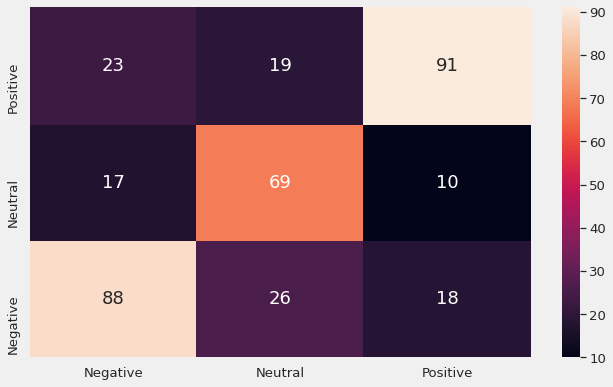

In [88]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [89]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [90]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [91]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4768347338935574
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [92]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.47645429362880887
Precision Score:  0.47645429362880887
Recall Score:  0.47645429362880887
F1 Score:  0.47645429362880887


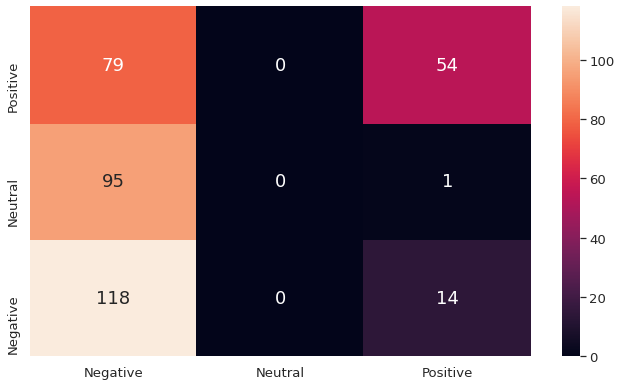

In [93]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [94]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [95]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7340720221606648
Precision Score:  0.7340720221606648
Recall Score:  0.7340720221606648
F1 Score:  0.7340720221606648


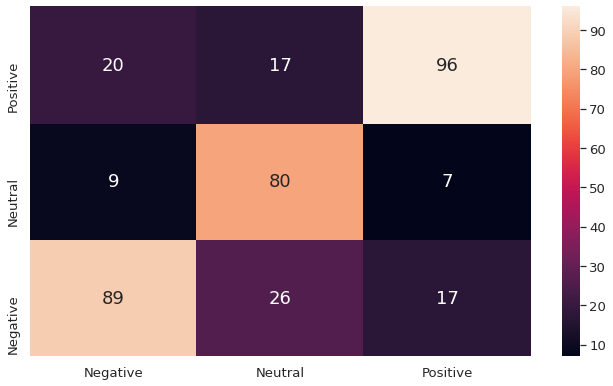

In [96]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [97]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [98]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, max_depth=12, criterion=gini, score=0.574, total=   1.3s
[CV] n_estimators=500, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=500, max_depth=12, criterion=gini, score=0.560, total=   1.3s
[CV] n_estimators=500, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=500, max_depth=12, criterion=gini, score=0.595, total=   1.3s
[CV] n_estimators=500, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=500, max_depth=12, criterion=gini, score=0.530, total=   1.3s
[CV] n_estimators=500, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=500, max_depth=12, criterion=gini, score=0.595, total=   1.3s
[CV] n_estimators=1100, max_depth=19, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=entropy, score=0.580, total=   3.7s
[CV] n_estimators=1100, max_depth=19, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.2s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=entropy, score=0.643, total=   3.8s
[CV] n_estimators=1100, max_depth=19, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.0s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=entropy, score=0.595, total=   3.6s
[CV] n_estimators=1100, max_depth=19, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.6s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=entropy, score=0.530, total=   3.7s
[CV] n_estimators=1100, max_depth=19, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   21.3s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=entropy, score=0.631, total=   3.7s
[CV] n_estimators=400, max_depth=1, criterion=entropy ................
[CV]  n_estimators=400, max_depth=1, criterion=entropy, score=0.408, total=   0.6s
[CV] n_estimators=400, max_depth=1, criterion=entropy ................
[CV]  n_estimators=400, max_depth=1, criterion=entropy, score=0.417, total=   0.6s
[CV] n_estimators=400, max_depth=1, criterion=entropy ................
[CV]  n_estimators=400, max_depth=1, criterion=entropy, score=0.423, total=   0.6s
[CV] n_estimators=400, max_depth=1, criterion=entropy ................
[CV]  n_estimators=400, max_depth=1, criterion=entropy, score=0.399, total=   0.6s
[CV] n_estimators=400, max_depth=1, criterion=entropy ................
[CV]  n_estimators=400, max_depth=1, criterion=entropy, score=0.417, total=   0.6s
[CV] n_estimators=1100, max_depth=3, criterion=gini ..................
[CV]  n_estimators=1100, max_depth=3, criterion=gini, score=0.527, total= 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


0.5957382361228515
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [99]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6648199445983379
Precision Score:  0.6648199445983379
Recall Score:  0.6648199445983379
F1 Score:  0.6648199445983379


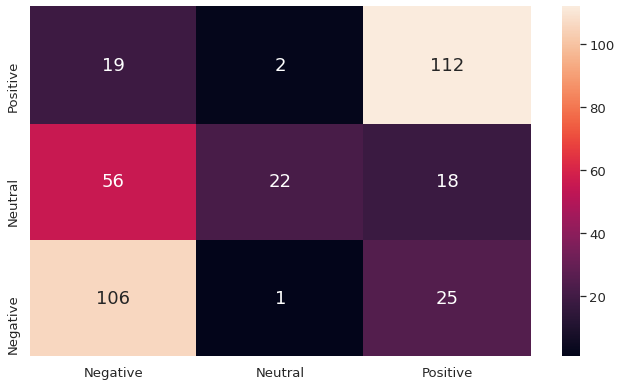

In [100]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [101]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6398891966759003
Precision Score:  0.6398891966759003
Recall Score:  0.6398891966759003
F1 Score:  0.6398891966759003


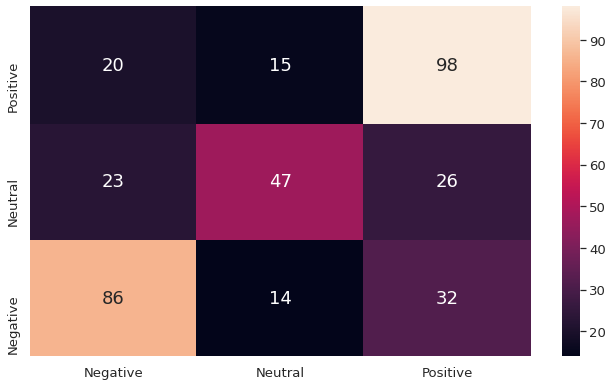

In [102]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [103]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [104]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5969327731092438
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [105]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6398891966759003
Precision Score:  0.6398891966759003
Recall Score:  0.6398891966759003
F1 Score:  0.6398891966759003


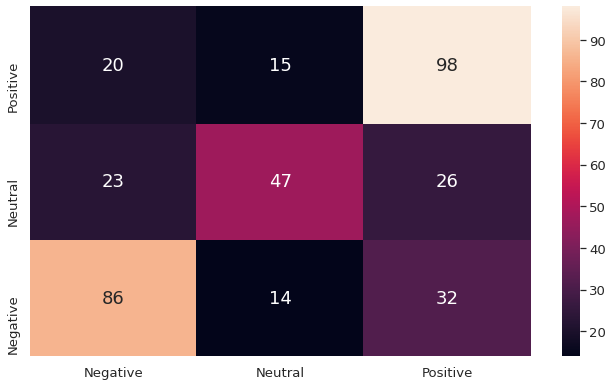

In [106]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

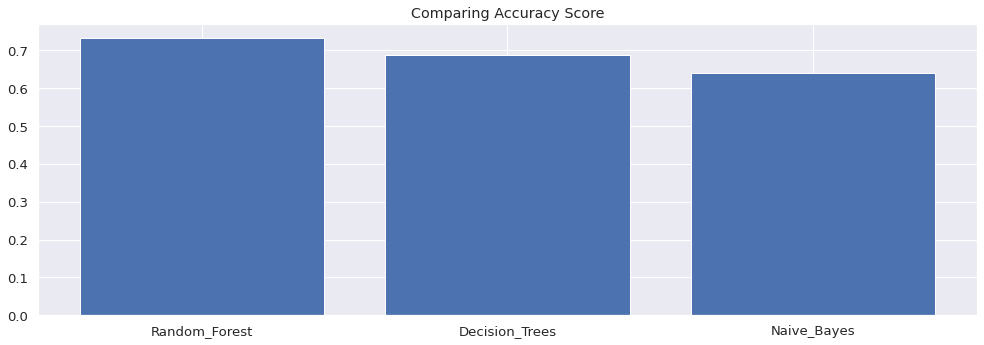

In [107]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

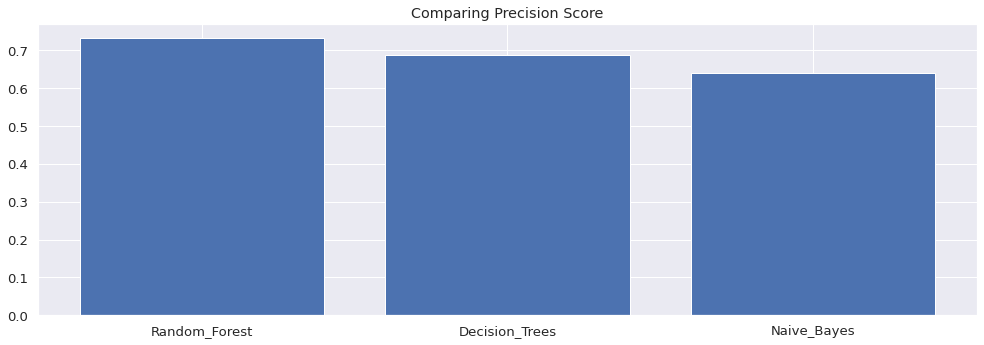

In [108]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

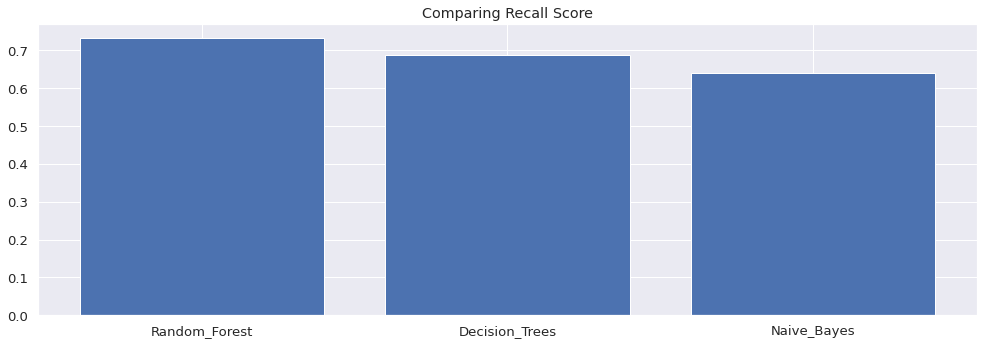

In [109]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

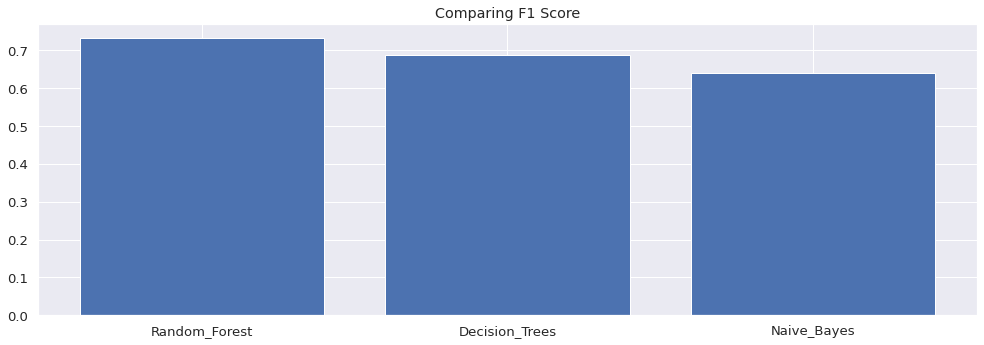

In [110]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()